In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os

In [7]:
def plot_cmplot_cm(labels, predictions, target_names=None):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix for multi classification model')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print(classification_report(labels, predictions, target_names=target_names))

In [8]:
def plot_history(history):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    
    num_epochs = len(history.epoch)
    epochs = [x+1 for x in history.epoch]
    
    ax1.plot(epochs, history.history["loss"], marker='.', label="train_loss")
    ax1.plot(epochs, history.history["val_loss"], marker='.', label="val_loss")
    ax1.set_ylabel("Loss")
    ax1.set_title("Train and Validation Loss Over Epochs", fontsize=14)
    ax1.set_xticks(epochs[0::int(num_epochs/5)], epochs[0::int(num_epochs/5)])
    ax1.set_xlabel("Epochs")
    ax1.legend()
    ax1.grid()
    
    ax2.plot(epochs, history.history["accuracy"], marker='.', label="train_accuracy")
    ax2.plot(epochs, history.history["val_accuracy"], marker='.', label="val_accuracy")
    ax2.set_ylabel("Accuracy")
    ax2.set_title("Train and Validation Accuracy Over Epochs", fontsize=14)
    ax2.set_xticks(epochs[0::int(num_epochs/5)], epochs[0::int(num_epochs/5)])
    ax2.set_xlabel("Epochs")
    ax2.legend()
    ax2.grid()
    
    plt.show()
    
    return

In [9]:
def category_extraction(df):    
    # extract attack category from label
    category_dict = {
        'DDoS-ACK_Fragmentation' : 'DDoS',
        'DDoS-HTTP_Flood' : 'DDoS',
        'DDoS-ICMP_Flood': 'DDoS',
        'DDoS-PSHACK_Flood': 'DDoS',
        'DDoS-RSTFINFlood': 'DDoS',
        'DDoS-SYN_Flood': 'DDoS',
        'DDoS-SlowLoris': 'DDoS',
        'DDoS-SynonymousIP_Flood': 'DDoS',
        'DDoS-TCP_Flood': 'DDoS',
        'DDoS-UDP_Flood': 'DDoS',
        'DDoS-UDP_Fragmentation': 'DDoS',
        'DDoS-ICMP_Fragmentation' : 'DDoS',

        'DoS-HTTP_Flood' : 'DoS',
        'DoS-SYN_Flood' : 'DoS',
        'DoS-TCP_Flood' : 'DoS',
        'DoS-UDP_Flood' : 'DoS',

        'DictionaryBruteForce' : 'BruteForce',

        'MITM-ArpSpoofing' : 'Spoofing',
        'DNS_Spoofing' : 'Spoofing',

        'Recon-HostDiscovery' : 'Recon',
        'Recon-OSScan' : 'Recon',
        'Recon-PingSweep' : 'Recon',
        'Recon-PortScan' : 'Recon',
        'VulnerabilityScan' : 'Recon',

        'SqlInjection' : 'Web-based',
        'CommandInjection' : 'Web-based',
        'Backdoor_Malware' : 'Web-based',
        'Uploading_Attack' : 'Web-based',
        'XSS' : 'Web-based',
        'BrowserHijacking' : 'Web-based',

        'Mirai-greeth_flood' : 'Mirai',
        'Mirai-greip_flood' : 'Mirai',
        'Mirai-udpplain' : 'Mirai',

        'BenignTraffic' : 'Benign'
    }

    # label encoding for attack categories
    df_label_cat = df.label.apply(lambda x: category_dict.get(x))
    df['label'] = df_label_cat
    return df

In [13]:
def csvToBalancedDataset(first, last):
    balanced_dfs = []
    for index in range(first,last):
        try:
            #df = pd.read_csv(f"/kaggle/input/cic-iot-2023/part-{str(index).zfill(5)}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
            df = pd.read_csv(f"C:/Users/Pc/Desktop/Masters Project/Dataset_CICIOT_2023/part-{str(index).zfill(5)}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
        except Exception:
            print("index out of range")
        # change column names
        df.columns = ['_'.join(c.split(' ')).lower() for c in df.columns]
        
        # drop NULLs & reset index
        entries_before = len(df)
        df.dropna(inplace=True)
        df.reset_index(inplace=True, drop=True)
        # extract binary labels
        df = category_extraction(df)
        # balance the classes in each dataframe
        # TO DO
        balanced_dfs.append(df)
    
    return pd.concat(balanced_dfs, axis=0, ignore_index=True)

In [39]:
#to load the Data file to dataframe
df = csvToBalancedDataset(0,50)
df['label'].value_counts()

label
DDoS          9361472
DoS           2227900
Mirai          725551
Benign         302896
Spoofing       134176
Recon           97110
Web-based        6850
BruteForce       3590
Name: count, dtype: int64

<Axes: ylabel='count'>

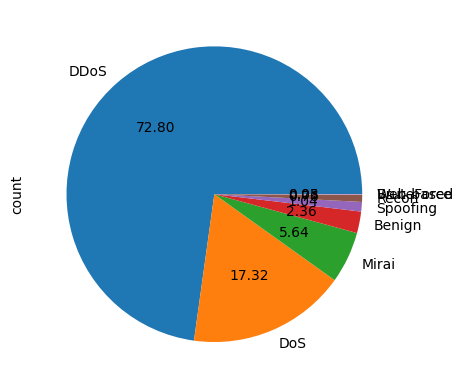

In [28]:
#show pie plot approach 1
df['label'].value_counts().plot.pie(autopct='%.2f',startangle=0)

#show pie plot approach 2 with matplotlib.pyplot as plt
figl, axl = plt.subplots()
axl.pie(df['label'].value_counts(),autopct='%.2f',labels=df['label'].value_counts().index)
#plt.legend()

([<matplotlib.patches.Wedge at 0x1628f2b9060>,
 [Text(-0.7221882062430218, 0.829725373098525, 'DDoS'),
  Text(0.4343420912985479, -1.0106171123261292, 'DoS'),
  Text(0.9936491435006083, -0.47187008765178984, 'Mirai'),
  Text(1.079764906216568, -0.21001844514976895, 'Benign'),
  Text(1.0959979162312836, -0.093747360585163, 'Spoofing'),
  Text(1.0995430439144929, -0.03170322663786015, 'Recon'),
  Text(1.0999935382431898, -0.0037703876761015676, 'Web-based'),
  Text(1.0999995768486959, -0.0009648485323850172, 'BruteForce')],
 [Text(-0.39392083976892095, 0.45257747623555905, '72.80'),
  Text(0.2369138679810261, -0.551245697632434, '17.32'),
  Text(0.5419904419094226, -0.25738368417370355, '5.64'),
  Text(0.5889626761181279, -0.11455551553623758, '2.36'),
  Text(0.5978170452170637, -0.05113492395554345, '1.04'),
  Text(0.599750751226087, -0.017292669075196443, '0.76'),
  Text(0.5999964754053763, -0.0020565750960554003, '0.05'),
  Text(0.5999997691901976, -0.0005262810176645548, '0.03')])

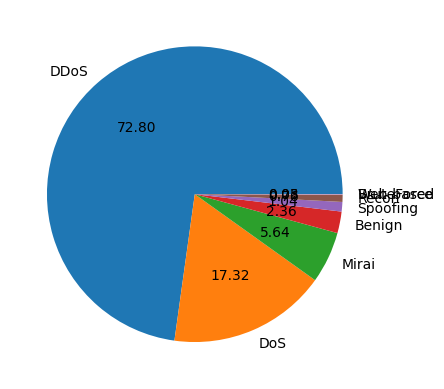

In [18]:
# Saving the objects:
print(os.getcwd())
with open('objs.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(df, f)

c:\GIT_PROJECTS\GITHUB_TEST\master project\NoteBook_MasterProject


OSError: [Errno 28] No space left on device

In [49]:
# Getting back the objects:
with open('objs.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    df = pickle.load(f)

In [44]:
y = df['label']
x = df.drop('label', axis=1)

label
Benign        10000
DDoS          10000
DoS           10000
Mirai         10000
Recon         10000
Spoofing      10000
Web-based      6850
BruteForce     3590
Name: count, dtype: int64

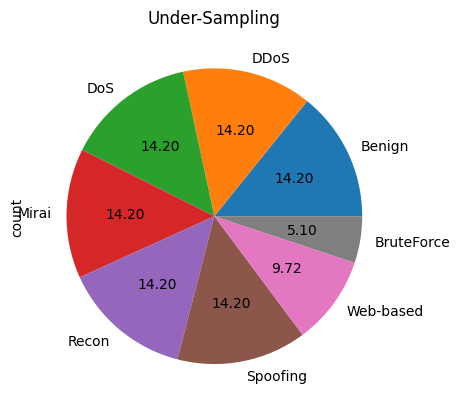

In [46]:
#since the data is unbalanced undersampling the parts with more number of samples samples >10000 reduced to 10000
from imblearn.under_sampling import RandomUnderSampler

dic = {'DDoS':10000, 'DoS':10000, 'Mirai':10000, 'Benign':10000, 'Spoofing':10000, 'Recon':10000}
rus = RandomUnderSampler(random_state=42, sampling_strategy=dic)
x, y = rus.fit_resample(x, y)

ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-Sampling")
y.value_counts()

label
Benign        10000
BruteForce    10000
DDoS          10000
DoS           10000
Mirai         10000
Recon         10000
Spoofing      10000
Web-based     10000
Name: count, dtype: int64

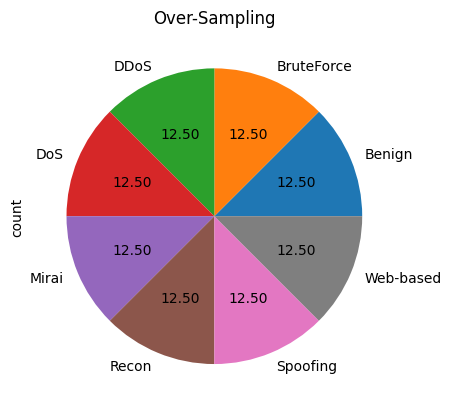

In [47]:
#since the data is unbalanced oversampling the parts with less number of samples samples <10000 increase it to 10000
from imblearn.over_sampling import RandomOverSampler

dic = {'Web-based':10000, 'BruteForce':10000}
ros = RandomOverSampler(random_state=42, sampling_strategy=dic)
x, y = ros.fit_resample(x, y)

ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-Sampling")
y.value_counts()

In [49]:
y.value_counts()

label
Benign        10000
BruteForce    10000
DDoS          10000
DoS           10000
Mirai         10000
Recon         10000
Spoofing      10000
Web-based     10000
Name: count, dtype: int64

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [51]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [52]:
# Spliting data 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [53]:
print("Data type: {}".format(x_train.dtype))
print("Range: [{}, {}]".format(np.min(x_train), np.max(x_train)))
print("(Height, Width): {}".format(x_train[0].shape))

Data type: float64
Range: [0.0, 1.0]
(Height, Width): (46,)


In [54]:
BATCH_SIZE = 64
AUTO = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(lambda x, y: (x, y), num_parallel_calls=AUTO).shuffle(train_ds.cardinality()).batch(BATCH_SIZE).prefetch(AUTO)

val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_ds = val_ds.map(lambda x, y: (x, y), num_parallel_calls=AUTO).batch(BATCH_SIZE).prefetch(AUTO)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(lambda x, y: (x, y), num_parallel_calls=AUTO).batch(BATCH_SIZE).prefetch(AUTO)

In [55]:
import tensorflow as tf

def create_model():
    
    model = tf.keras.models.Sequential([
            # first block
            tf.keras.layers.Conv1D(filters=64, kernel_size=(3), name="conv1", padding='same'),
            tf.keras.layers.Activation(activation="relu", name="act_conv1"),
            tf.keras.layers.MaxPooling1D(pool_size=(2), name="pool1"),
            # second block
            tf.keras.layers.Conv1D(filters=128, kernel_size=(3), name="conv2", padding='same'),
            tf.keras.layers.Activation(activation="relu", name="act_conv2"),
            tf.keras.layers.MaxPooling1D(pool_size=(2), name="pool2"),
            # third block
            tf.keras.layers.Conv1D(filters=256, kernel_size=(3), name="conv3", padding='same'),
            tf.keras.layers.Activation(activation="relu", name="act_conv3"),
            # flatten
            tf.keras.layers.Flatten(name="flatten"),
            # classifier
            tf.keras.layers.Dense(units=256, name="fc1"),
            tf.keras.layers.Activation(activation="relu", name="act_fc1"),
            tf.keras.layers.Dropout(rate=0.2, name="dropout_1"),
            tf.keras.layers.Dense(units=128, name="fc2"),
            tf.keras.layers.Activation(activation="relu", name="act_fc2"),
            tf.keras.layers.Dropout(rate=0.2, name="dropout_2"),
            tf.keras.layers.Dense(units=64, name="fc3"),
            tf.keras.layers.Activation(activation="relu", name="act_fc3"),
            tf.keras.layers.Dropout(rate=0.2, name="dropout_3"),
            tf.keras.layers.Dense(units=8, activation="softmax", name="output")
        ])
    
    model.build(input_shape=(None, 46, 1))
    return model
    
model = create_model()

In [56]:
model.summary(line_length=80)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv1D)                    │ (None, 46, 64)           │           256 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ act_conv1 (Activation)            │ (None, 46, 64)           │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)              │ (None, 23, 64)           │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2 (Conv1D)                    │ (None, 23, 128)          │        24,704 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ act_conv2 (Activation)            │ (None, 23, 128)          │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)              │ (None, 11, 128)          │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv3 (Conv1D)                    │ (None, 11, 256)          │        98,560 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ act_conv3 (Activation)            │ (None, 11, 256)          │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten (Flatten)                 │ (None, 2816)             │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ fc1 (Dense)                       │ (None, 256)              │       721,152 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ act_fc1 (Activation)              │ (None, 256)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_1 (Dropout)               │ (None, 256)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ fc2 (Dense)                       │ (None, 128)              │        32,896 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ act_fc2 (Activation)              │ (None, 128)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_2 (Dropout)               │ (None, 128)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ fc3 (Dense)                       │ (None, 64)               │         8,256 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ act_fc3 (Activation)              │ (None, 64)               │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_3 (Dropout)               │ (None, 64)               │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ output (Dense)                    │ (None, 8)                │           520 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 886,344 (3.38 MB)

 Trainable params: 886,344 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(
    optimizer=tf.optimizers.Adam(0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
    ]
)

In [58]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    train_ds,
    epochs=140,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/140


800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.4325 - loss: 1.2860 - val_accuracy: 0.6054 - val_loss: 0.8936
Epoch 2/140
800/800 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.5971 - loss: 0.9242 - val_accuracy: 0.6342 - val_loss: 0.8667
Epoch 3/140
800/800 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.6100 - loss: 0.8866 - val_accuracy: 0.6538 - val_loss: 0.8166
Epoch 4/140
800/800 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.6232 - loss: 0.8788 - val_accuracy: 0.6497 - val_loss: 0.8193
Epoch 5/140
800/800 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.6246 - loss: 0.8661 - val_accuracy: 0.6520 - val_loss: 0.8138
Epoch 6/140
800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.6365 - loss: 0.8453 - val_accuracy: 0.6580 - val_loss: 0.8002
Epoch 7/140
800/800 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.6360 - loss: 0.8520 - val_accuracy: 0.6587 - val_loss: 0.8094
Epoch 8/140
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6429 - loss: 0.8491 - val_

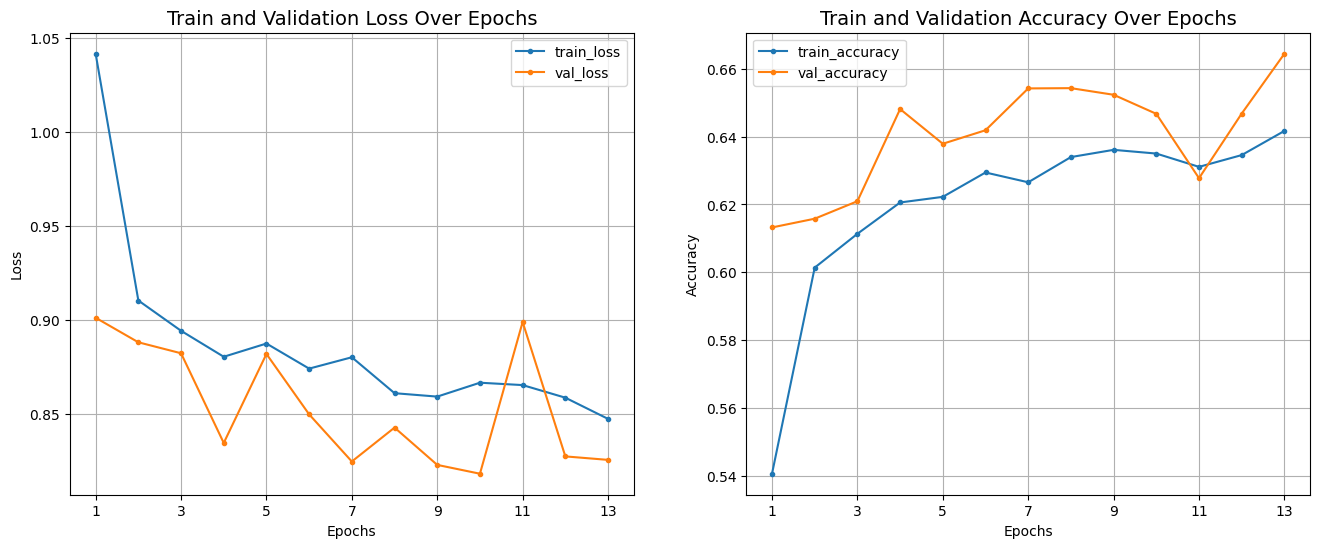

In [111]:
plot_history(history)

In [59]:
test_labels = np.concatenate([labels.numpy() for _, labels in test_ds])

In [60]:
predictions = model.predict(test_ds)
predictions = np.argmax(predictions, axis=1)

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


              precision    recall  f1-score   support

      Benign       0.57      0.66      0.61      1973
  BruteForce       0.41      0.53      0.46      2030
        DDoS       0.97      0.48      0.64      1920
         DoS       0.67      0.99      0.80      2063
       Mirai       1.00      0.99      0.99      2011
       Recon       0.84      0.45      0.58      1992
    Spoofing       0.84      0.55      0.66      2014
   Web-based       0.45      0.61      0.51      1997

    accuracy                           0.66     16000
   macro avg       0.72      0.66      0.66     16000
weighted avg       0.72      0.66      0.66     16000



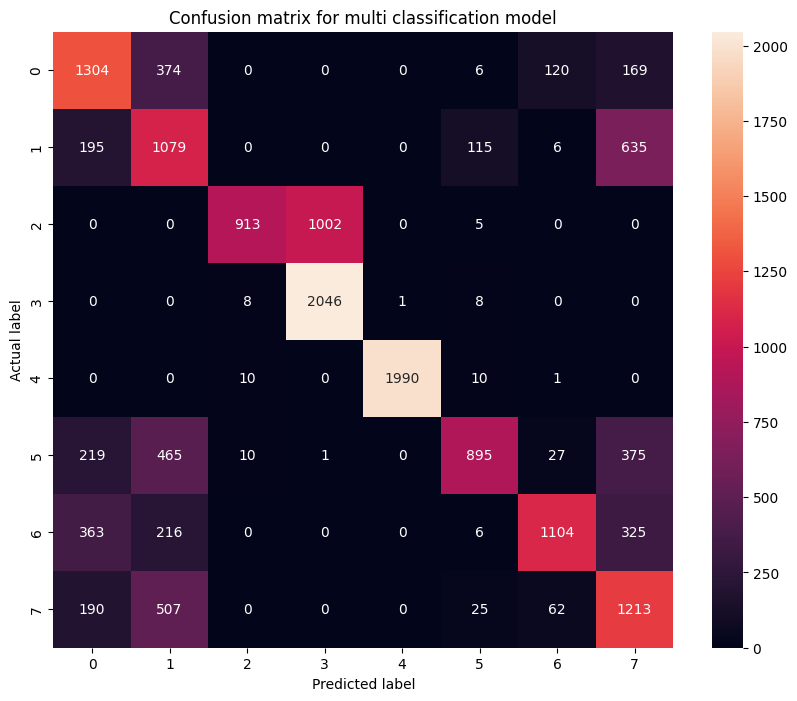

In [61]:
plot_cm(test_labels, predictions, label_encoder.classes_)

In [88]:
#sumplimentary calculation
loss, accuracy = model.evaluate(train_ds)
print("train_ds Test loss: {}".format(round(loss, 4)))
print("train_ds Test  accuracy: {}%".format(round(accuracy*100, 2)))

loss, accuracy = model.evaluate(val_ds)
print("val_ds Test loss: {}".format(round(loss, 4)))
print("val_ds Test  accuracy: {}%".format(round(accuracy*100, 2)))

800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6539 - loss: 0.8092
train_ds Test loss: 0.8044
train_ds Test  accuracy: 65.54%
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6715 - loss: 0.7847
val_ds Test loss: 0.7961
val_ds Test  accuracy: 66.94%


In [89]:
#Test calculation
loss, accuracy = model.evaluate(test_ds)
print("test_ds Test loss: {}".format(round(loss, 4)))
print("test_ds Test  accuracy: {}%".format(round(accuracy*100, 2)))

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6622 - loss: 0.7931
test_ds Test loss: 0.8003
test_ds Test  accuracy: 65.9%


In [86]:
#np.unique(test_labels)
values, counts = np.unique(predictions, return_counts=True)
#label_encoder.classes_
values, counts

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([2271, 2641,  941, 3049, 1991, 1070, 1320, 2717], dtype=int64))